<a href="https://colab.research.google.com/github/ruhend/tensorflower/blob/master/Lesson3/FashinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow_datasets

## Imports

In [4]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.7.0


## Loading Train and Test Datasets

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteO11YGO/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteO11YGO/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot']

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of Train Examples. :   ', num_train_examples)
print('Number of Test Examples   :   ', num_test_examples)

Number of Train Examples. :    60000
Number of Test Examples   :    10000


## Preprocess the Data

In [12]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

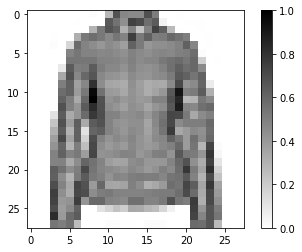

In [23]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

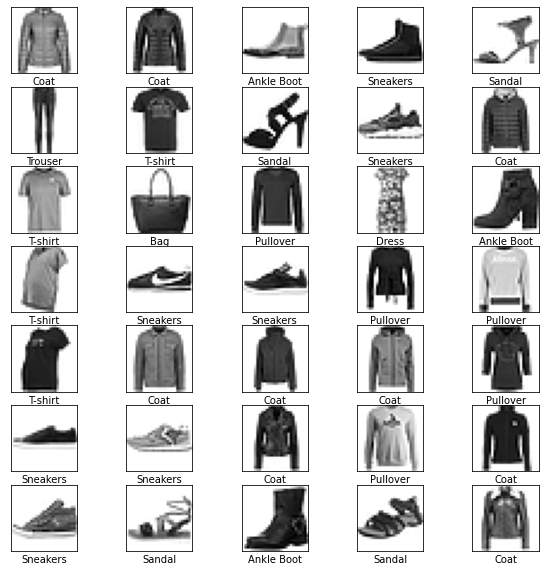

In [27]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(35):
  image = image.numpy().reshape((28,28))
  plt.subplot(7,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

## Bulding the Model

### Setting up the layers

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [36]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [37]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [38]:
model.fit(train_dataset, epochs = 5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 23s 6ms/step - loss: 0.5003 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3724 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3356 - accuracy: 0.8791
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3101 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2974 - accuracy: 0.8907
